In [2]:
import pandas as pd
df = pd.read_csv('flood.csv')
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


# Pair Plot (Scatter Plot Matrix)

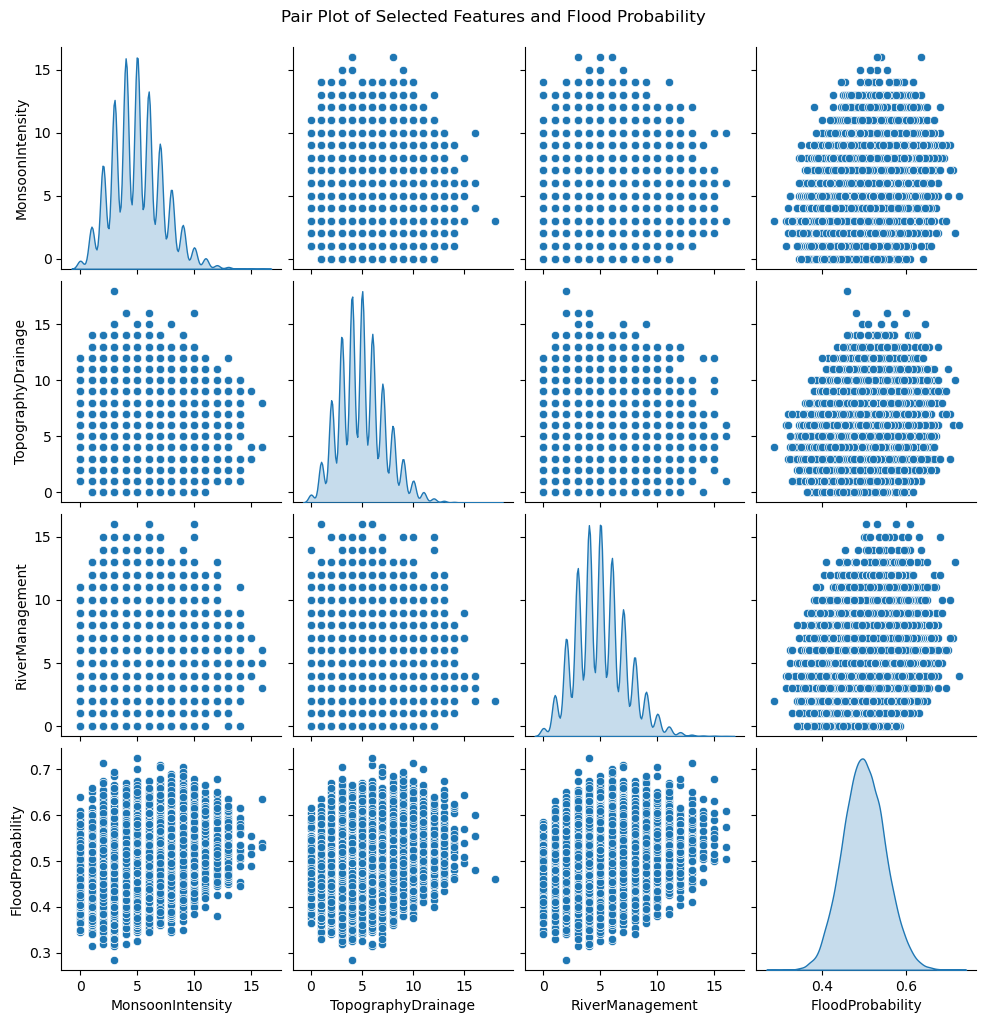

In [4]:
import seaborn as sns

# Create pair plot for selected features and flood probability
sns.pairplot(df, vars=['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'FloodProbability'], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features and Flood Probability', y=1.02)
plt.show()


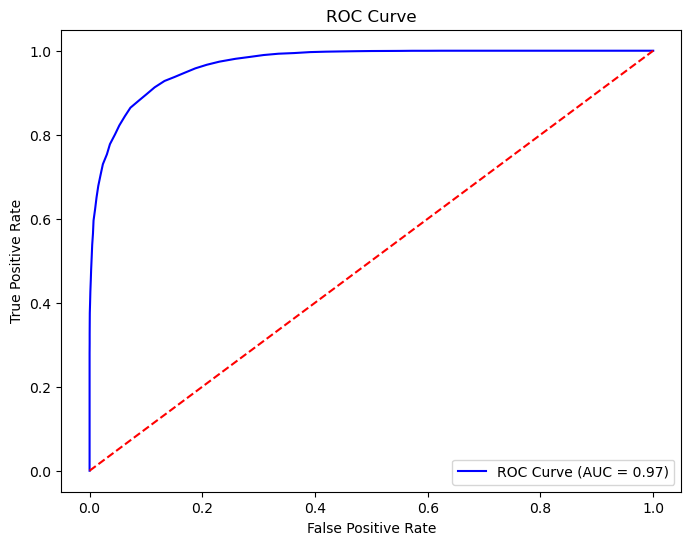

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

# Load the dataset
file_path = 'flood.csv'  # Replace with the correct path to your file
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop('FloodProbability', axis=1)
y = (df['FloodProbability'] > 0.5).astype(int)  # Binarize the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_prob = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


<Figure size 1600x1200 with 0 Axes>

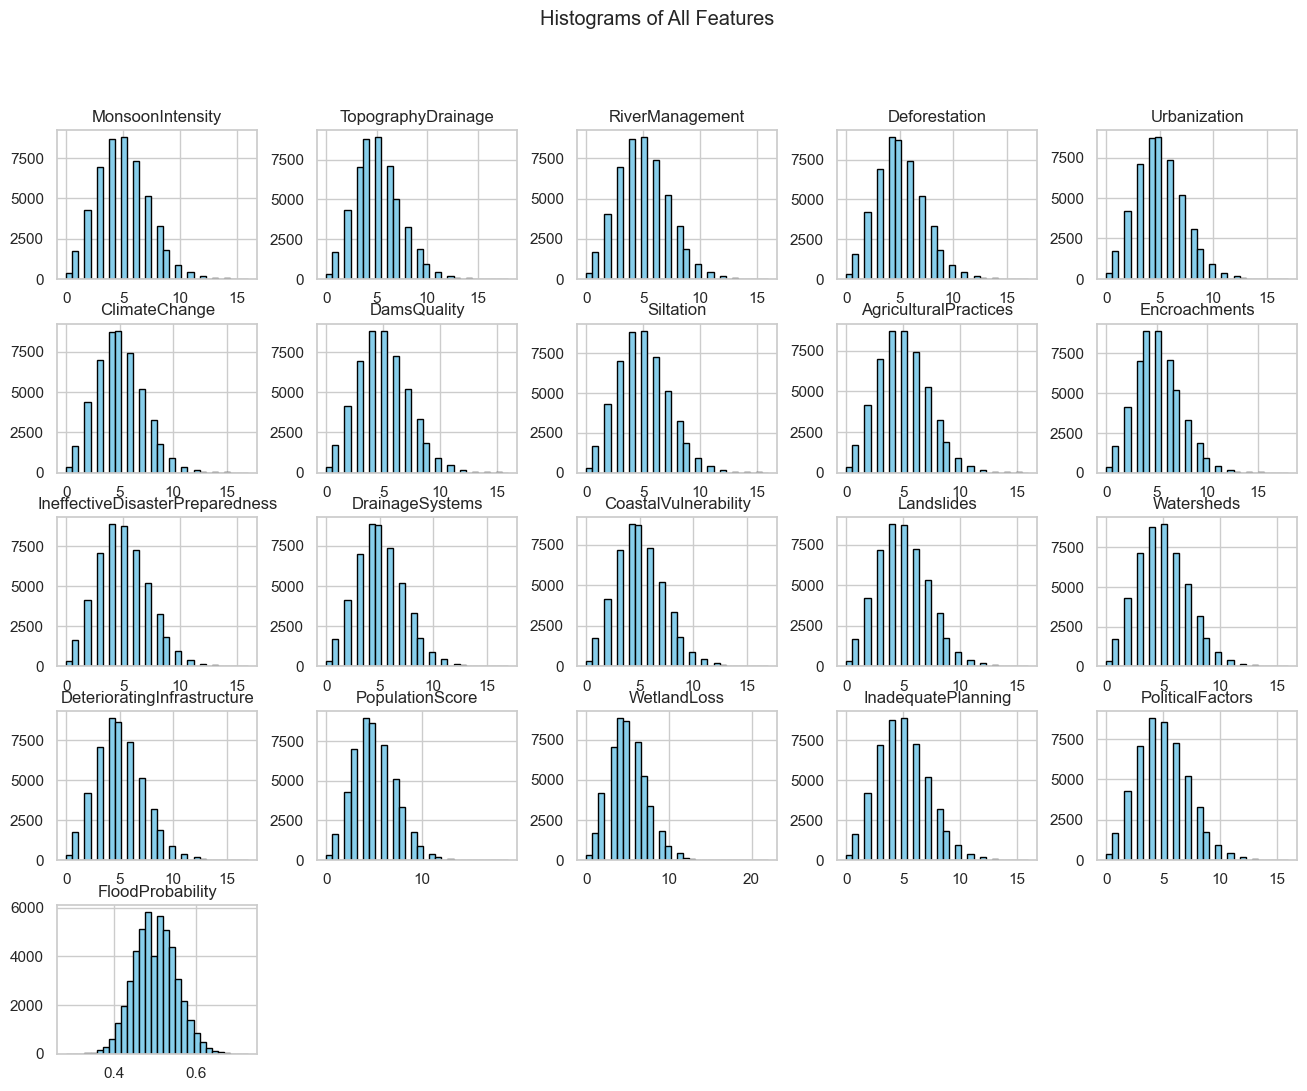

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'flood.csv'  # Update the path if necessary
df = pd.read_csv(data_path)

# Set Seaborn style for better visualization
sns.set(style="whitegrid")

# 1. Histograms and Density Plots
plt.figure(figsize=(16, 12))
df.hist(bins=30, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of All Features')
plt.show()



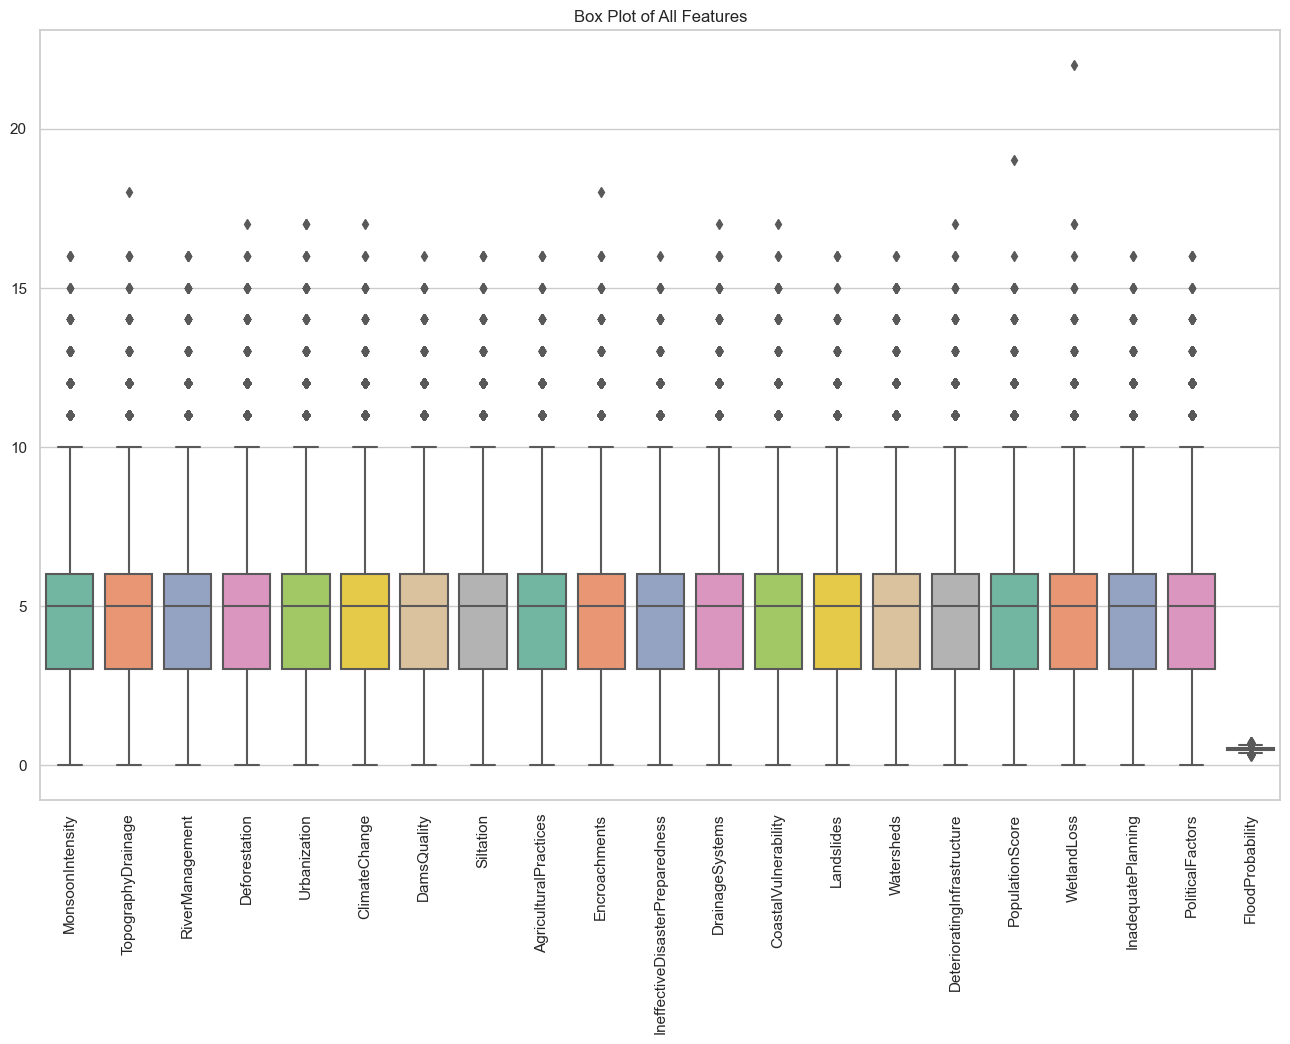

In [3]:
# 2. Box Plots for Outlier Detection
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, palette="Set2")
plt.title('Box Plot of All Features')
plt.xticks(rotation=90)
plt.show()


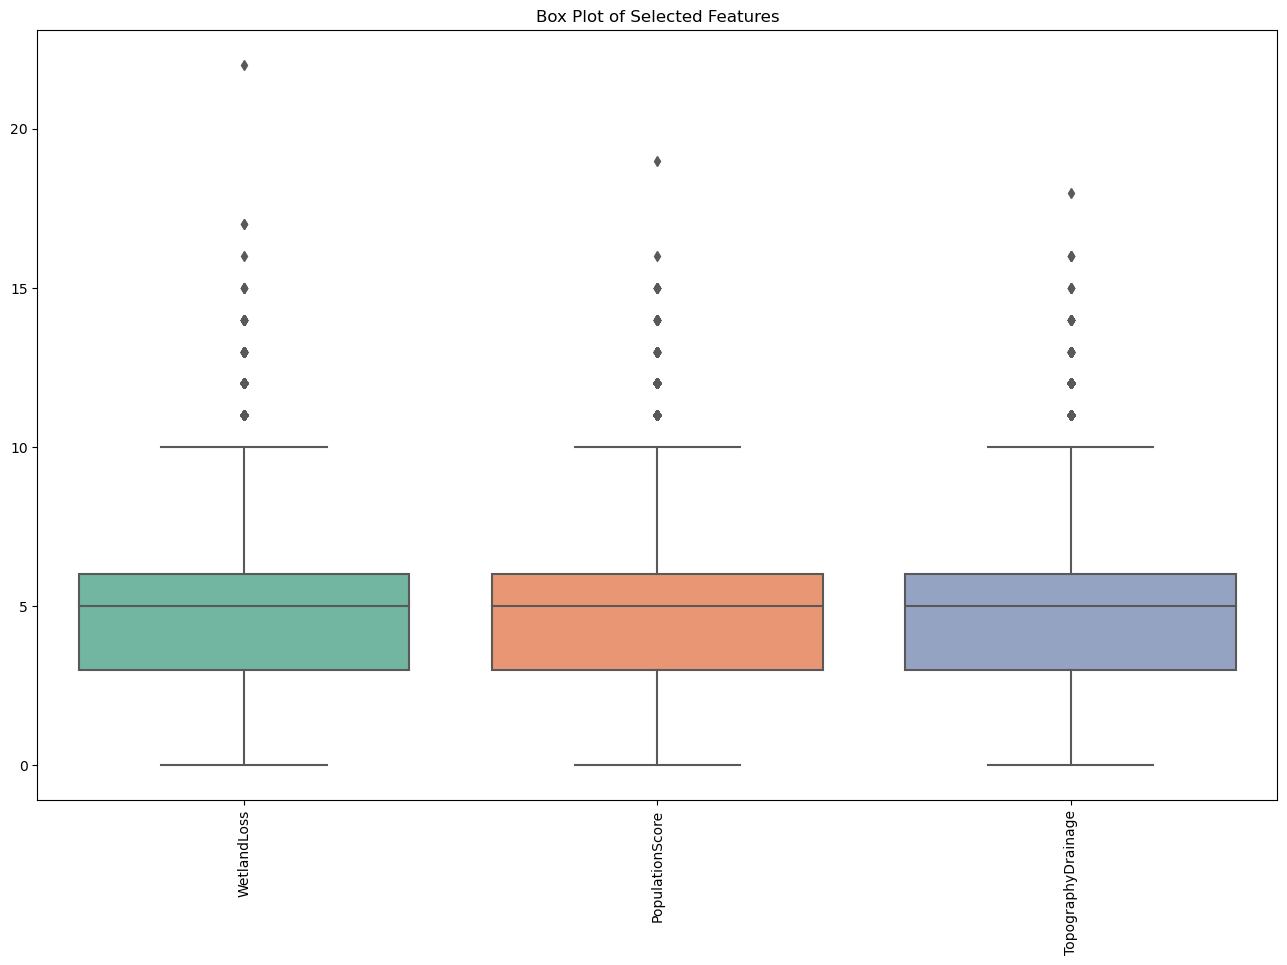

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the features you want to include in the box plot
selected_features = ['WetlandLoss', 'PopulationScore', 'TopographyDrainage']  # Replace with your actual feature names

plt.figure(figsize=(16, 10))
sns.boxplot(data=df[selected_features], palette="Set2")
plt.title('Box Plot of Selected Features')
plt.xticks(rotation=90)
plt.show()

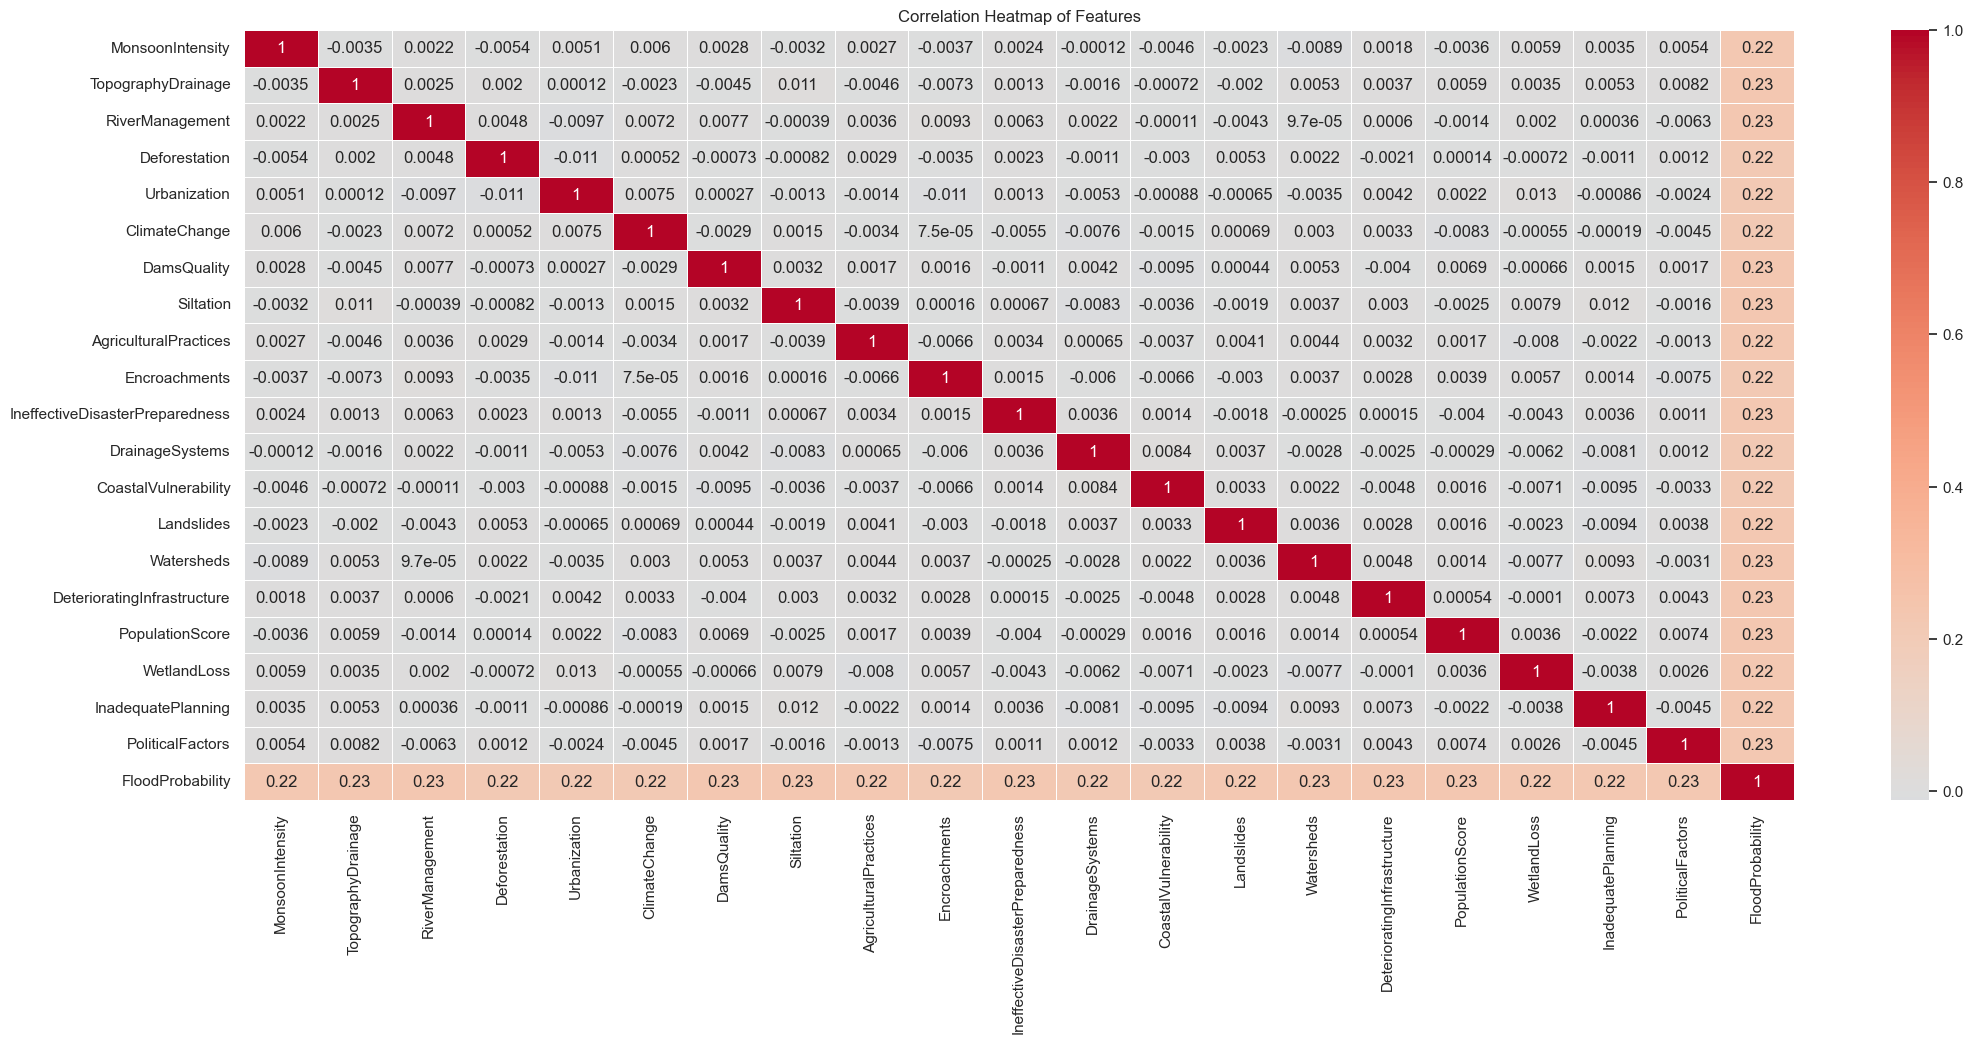

In [6]:

# 3. Correlation Heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()



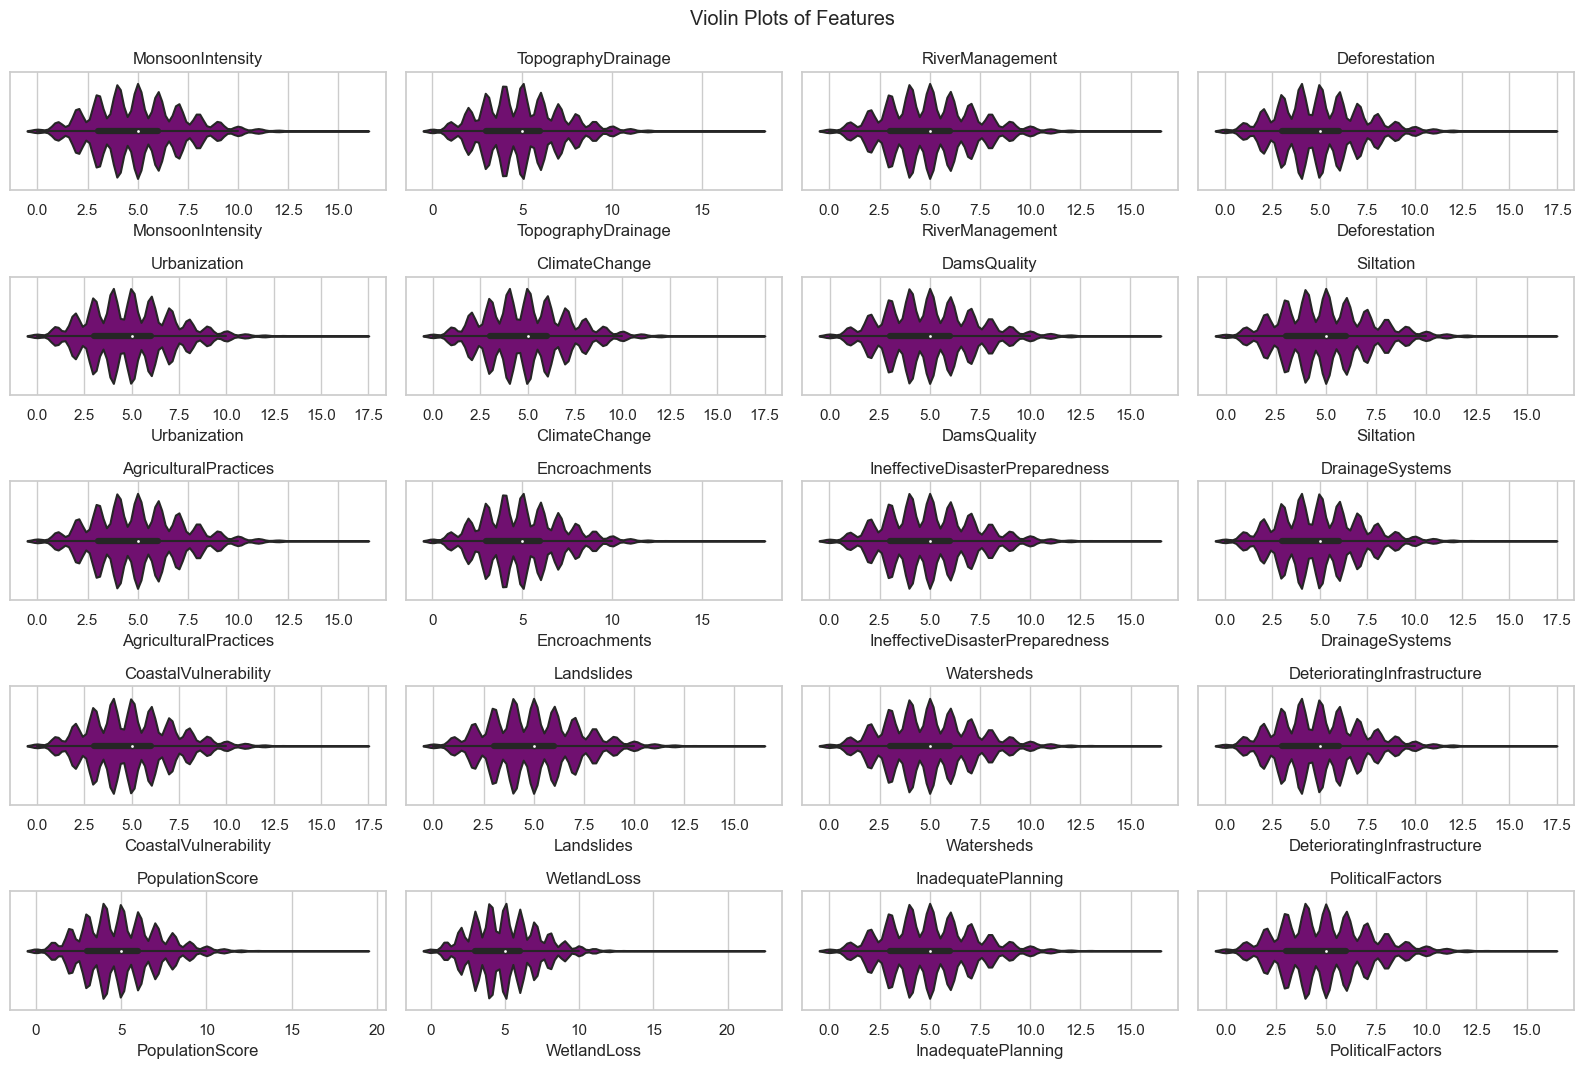

In [8]:
# 5. Violin Plots for Each Feature
plt.figure(figsize=(16, 12))
for i, column in enumerate(df.columns[:-1]):  # Skipping the target variable 'Flood Probability' if it's the last column
    plt.subplot(6, 4, i + 1)
    sns.violinplot(x=df[column], color='purple')
    plt.title(column)
plt.tight_layout()
plt.suptitle('Violin Plots of Features', y=1.02)
plt.show()



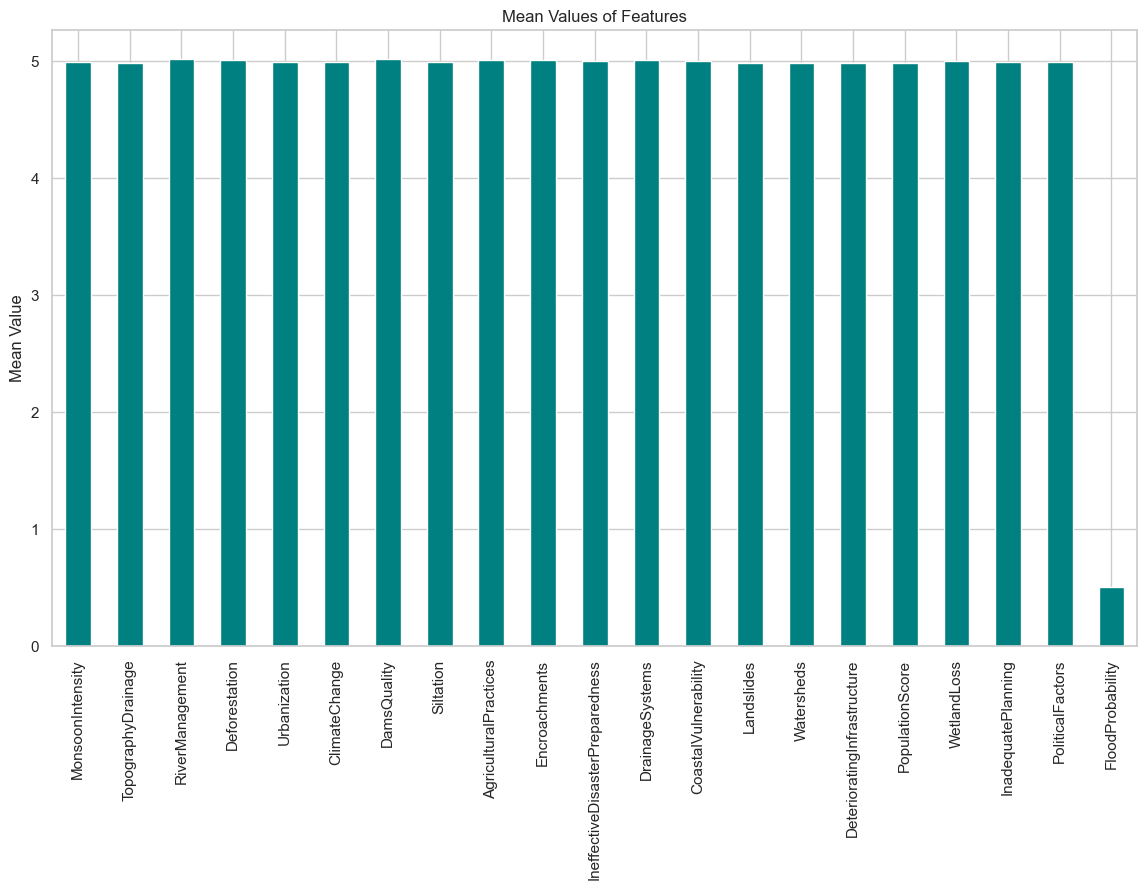

In [9]:
# 6. Bar Plot of Means for Each Feature (if applicable)
plt.figure(figsize=(14, 8))
df.mean().plot(kind='bar', color='teal')
plt.title('Mean Values of Features')
plt.xticks(rotation=90)
plt.ylabel('Mean Value')
plt.show()



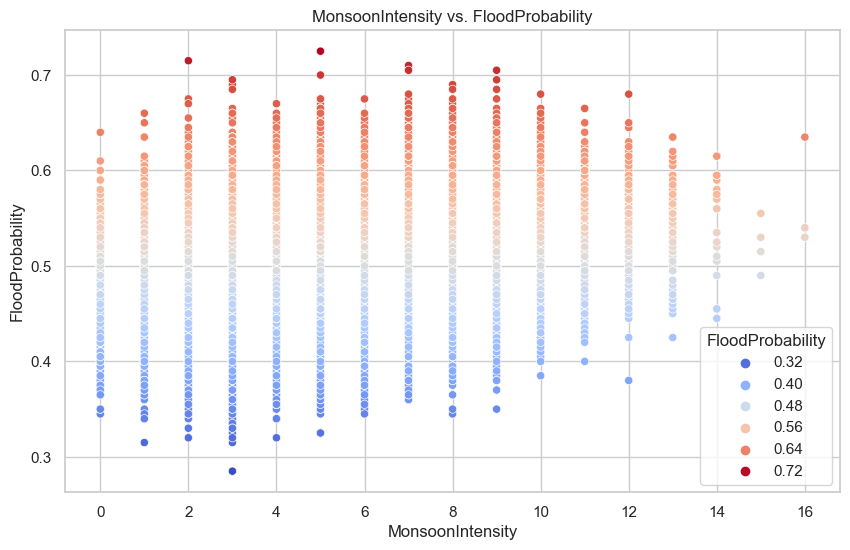

In [10]:
# 7. Scatter Plot: Example with Monsoon Intensity vs. Flood Probability
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['MonsoonIntensity'], y=df['FloodProbability'], hue=df['FloodProbability'], palette='coolwarm')
plt.title('MonsoonIntensity vs. FloodProbability')
plt.xlabel('MonsoonIntensity')
plt.ylabel('FloodProbability')
plt.show()



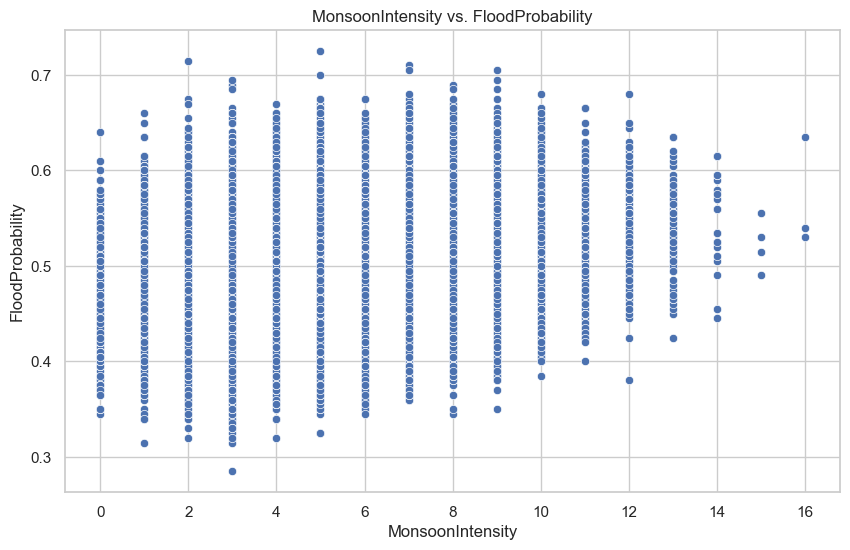

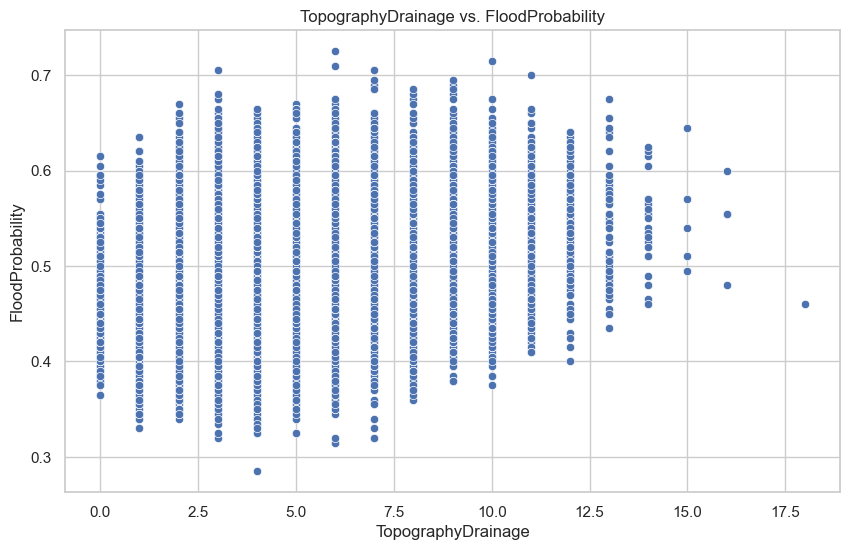

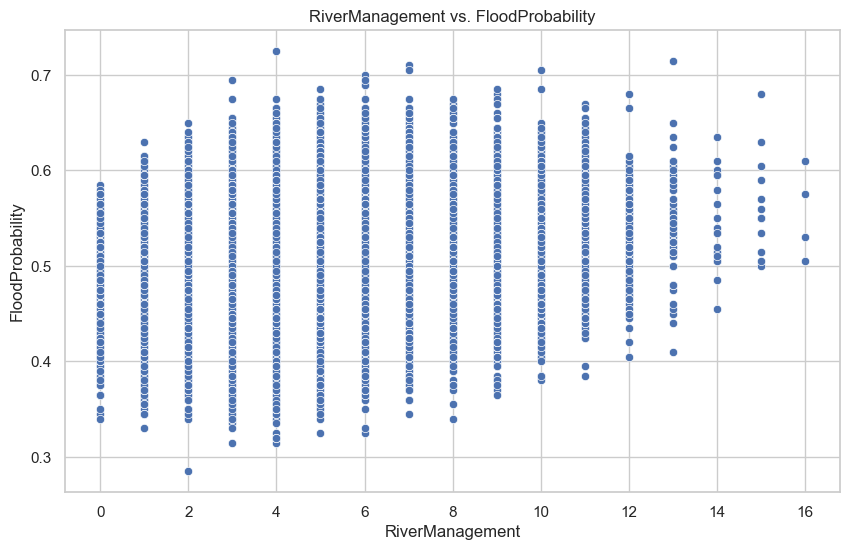

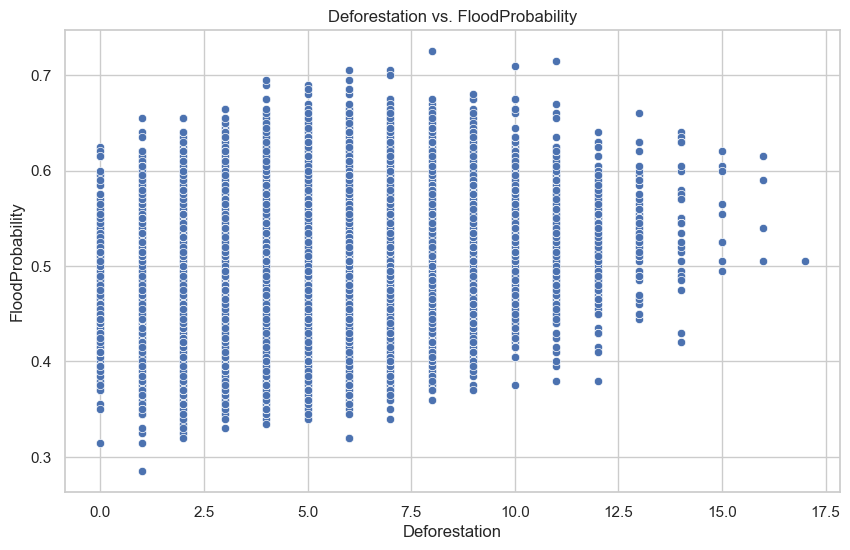

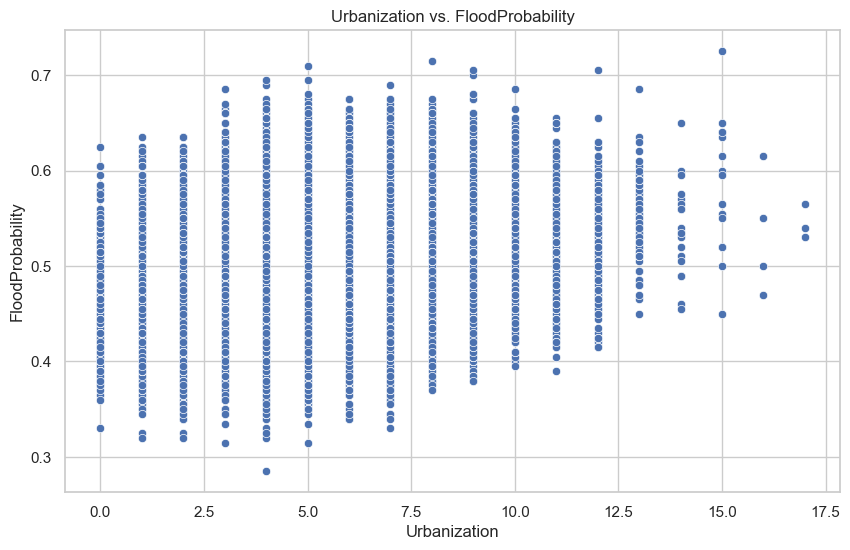

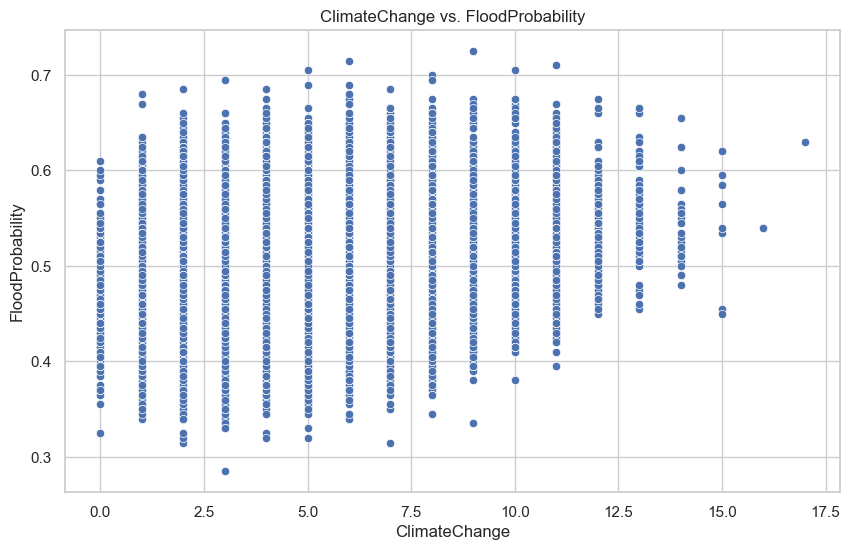

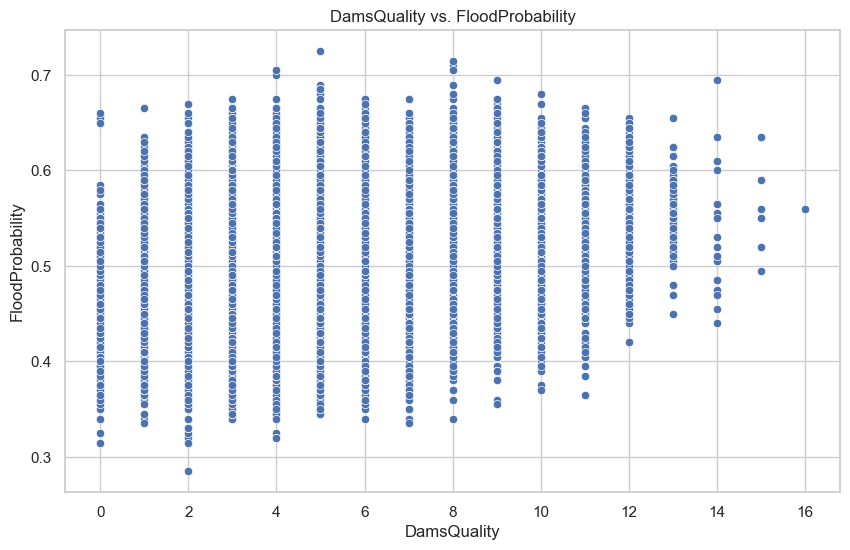

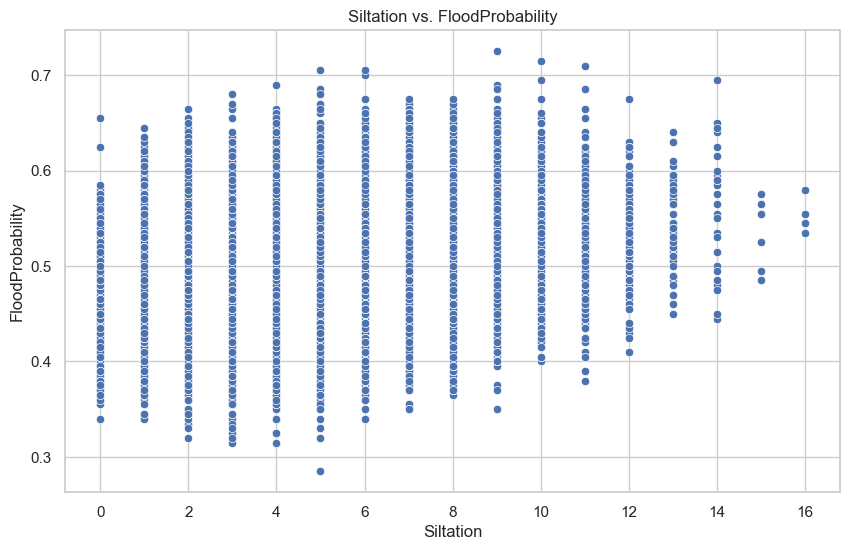

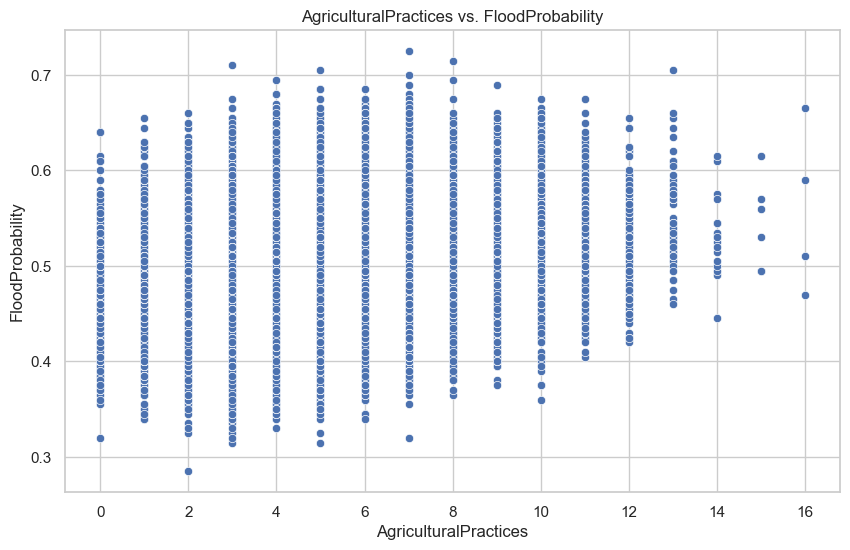

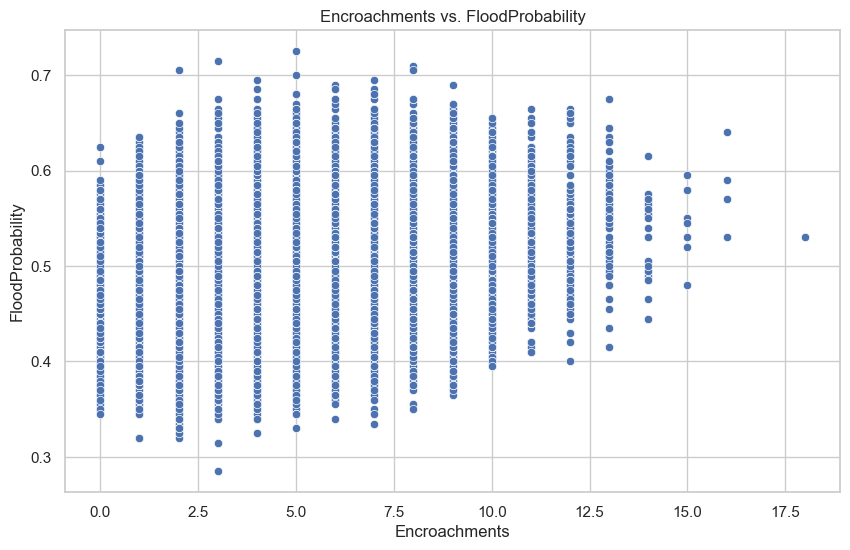

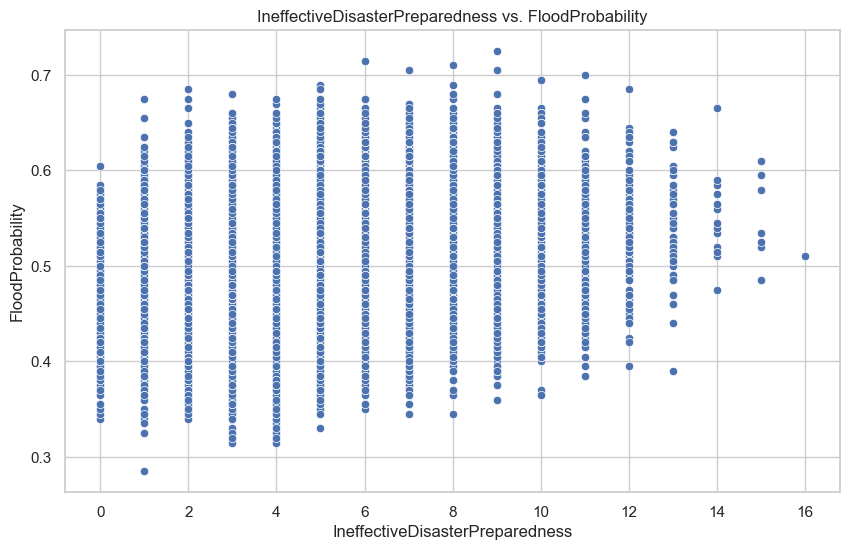

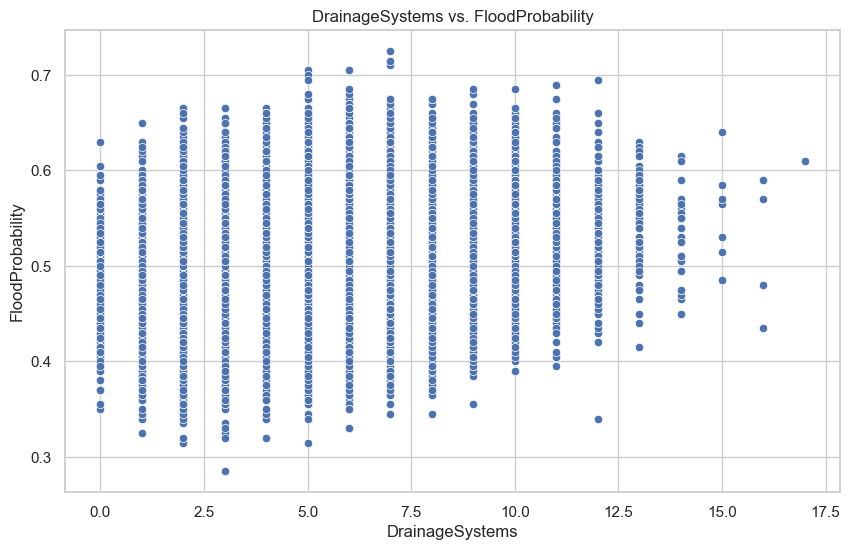

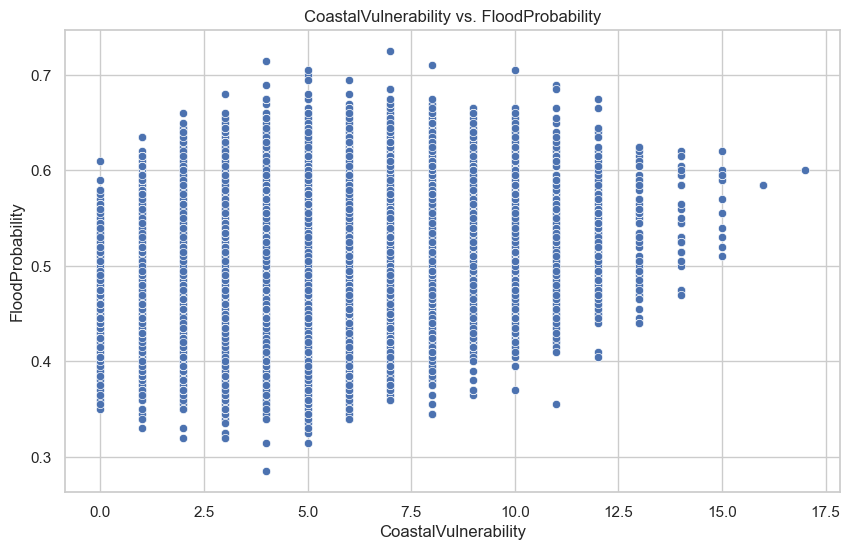

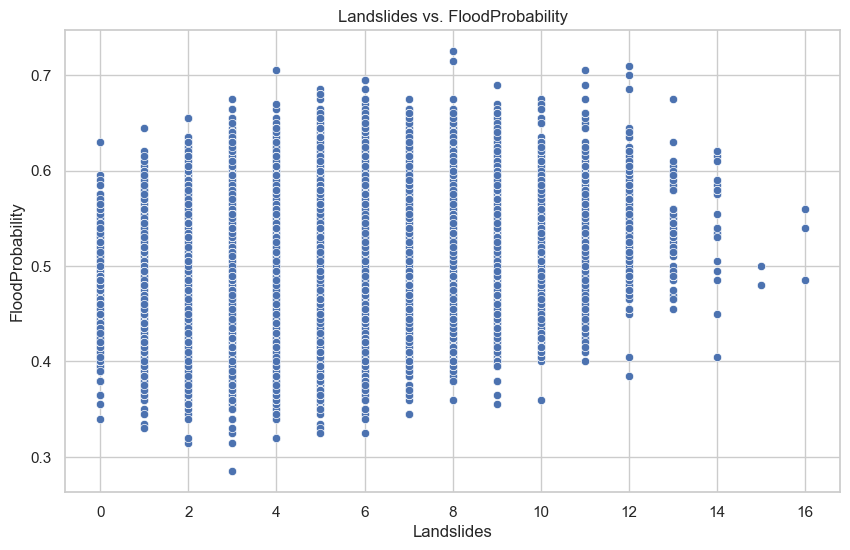

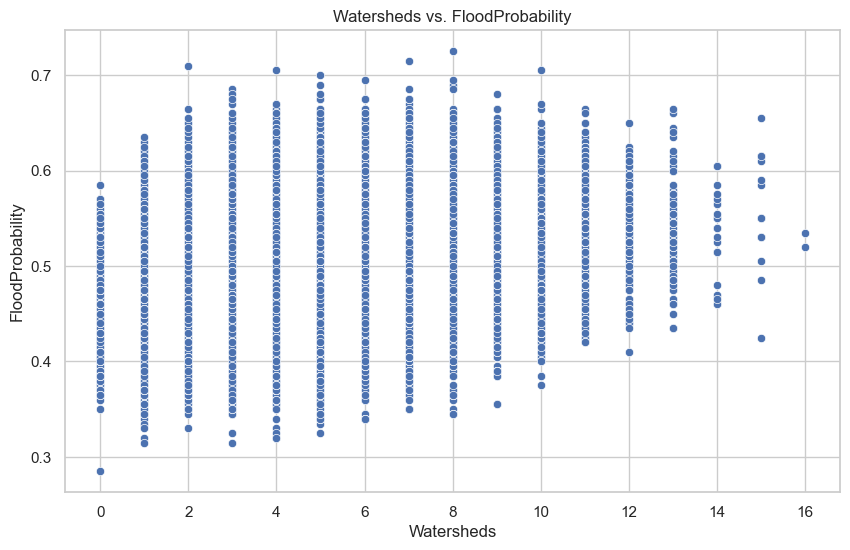

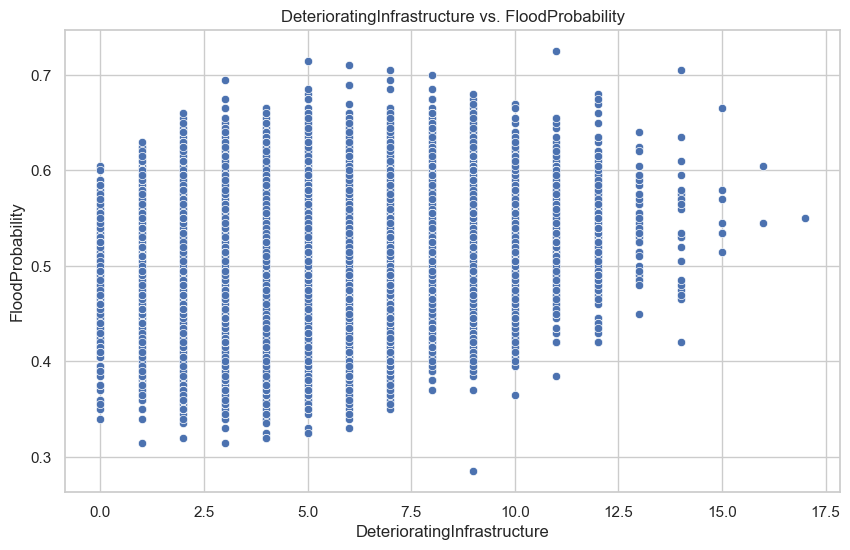

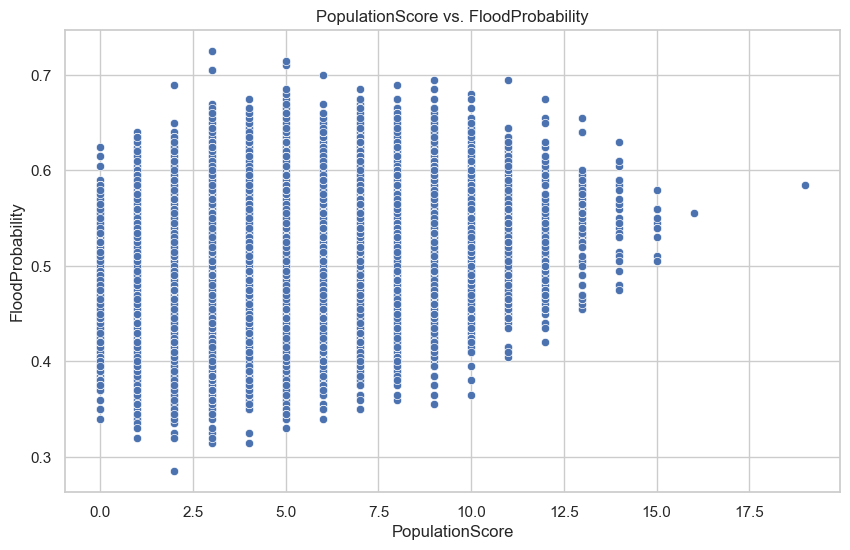

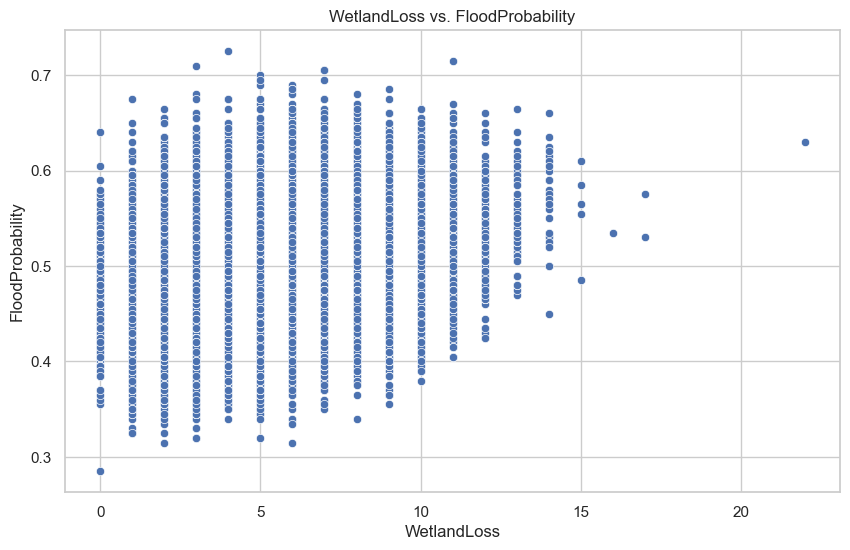

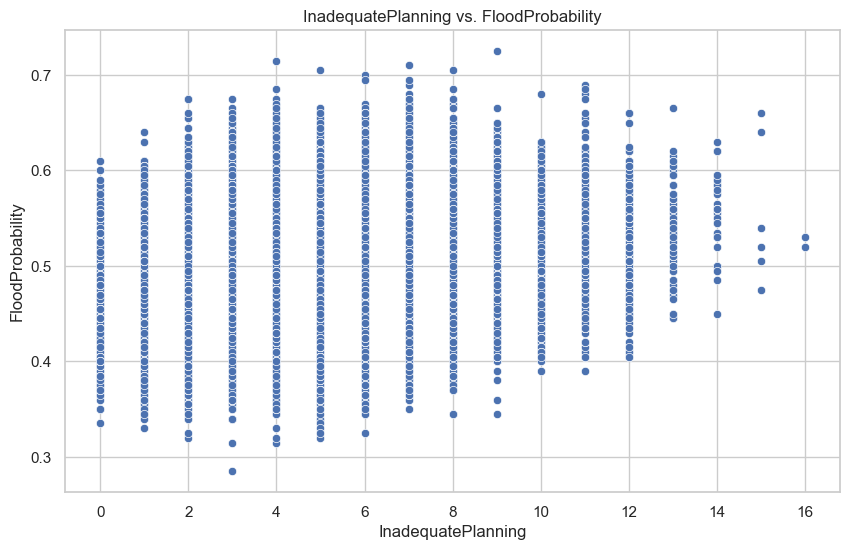

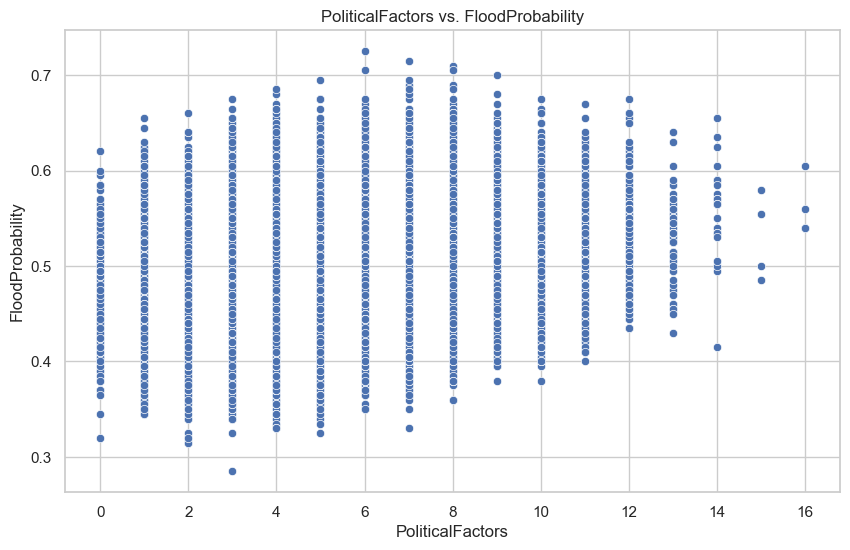

In [11]:
# 8. Feature vs. Target (Flood Probability) Plots
# For all features individually against the target variable
for feature in df.columns[:-1]:  # Assuming 'Flood Probability' is the last column
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df['FloodProbability'])
    plt.title(f'{feature} vs. FloodProbability')
    plt.xlabel(feature)
    plt.ylabel('FloodProbability')
    plt.grid(True)
    plt.show()



In [12]:

# 9. Pairwise Feature Interaction Plot
plt.figure(figsize=(14, 10))
sns.pairplot(df, kind='scatter', diag_kind='kde', hue='FloodProbability', palette='coolwarm')
plt.suptitle('Pairwise Feature Interaction', y=1.02)
plt.show()


KeyboardInterrupt: 

<Figure size 1400x1000 with 0 Axes>

Error in callback <function flush_figures at 0x00000156C37D18A0> (for post_execute):


KeyboardInterrupt: 